<a href="https://colab.research.google.com/github/ZachMckennedyFWig/DSPS_ZMckennedy/blob/main/HW9/LATEBUTCOMPLETEMckennedyGaitherhiggsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import json
import pandas as pd
import os
import numpy as np
import seaborn as sns
import missingno as msno

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [37]:
cd /content/drive/MyDrive/DSPS2023

/content/drive/MyDrive/DSPS2023


In [38]:
envs = json.load(open(".kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [39]:
import kaggle

In [40]:
!kaggle competitions download -c higgs-boson

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.csv  wine.data
higgs-boson.zip                          test.zip               training.zip  wine.names


In [42]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
replace HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [43]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training.csv            



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [62]:
higgsdata = pd.read_csv('training.csv', sep=',')

In [63]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [64]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf):

In [65]:
higgsdata.drop(columns=['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','DER_lep_eta_centrality','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi'], inplace=True)
higgsdata = higgsdata[~higgsdata.isin([-999.000]).any(axis=1)]

In [66]:
labels = higgsdata['Label'].values
# 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"
labels

array(['s', 'b', 'b', ..., 'b', 's', 'b'], dtype=object)

In [67]:
weights = higgsdata['Weight'].values
# the weight of the particle
weights

array([2.65331134e-03, 2.23358449e+00, 5.44637821e+00, ...,
       6.40607773e-02, 1.86361167e-02, 1.68161144e+00])

In [68]:
higgsdata.drop(columns=['Label','Weight'],inplace= True)

use the "training.csv" file, but create your own train/test sets

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_x, test_x, train_y, test_y = train_test_split(higgsdata, labels, test_size=0.25, random_state=365)

In [71]:
train_x

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
185157,285157,100.765,26.783,71.727,6.264,3.266,6.264,57.396,1.160,0.988,...,0.196,-2.113,30.828,-1.207,1.220,5.870,-2.111,86.393,0,-0.000
230932,330932,121.304,37.073,91.504,49.788,1.968,45.245,196.683,0.544,-0.908,...,1.933,1.733,39.850,2.350,-0.190,29.711,-1.328,211.590,1,83.556
20623,120623,96.862,19.447,57.461,52.833,2.741,25.971,119.318,1.355,-1.101,...,-2.113,1.611,33.103,-1.587,-1.981,46.136,-1.479,143.404,1,61.791
246493,346493,324.864,217.215,153.346,61.964,2.892,48.429,194.971,2.303,1.201,...,0.483,-2.659,114.452,0.943,0.196,106.682,-2.575,416.253,1,30.825
201978,301978,127.767,6.809,88.954,53.711,2.985,22.759,99.557,2.129,0.632,...,1.937,-1.266,43.423,-0.098,2.832,21.231,2.608,160.463,1,35.737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,117197,101.617,24.010,69.402,84.089,1.789,33.683,206.591,0.655,1.411,...,-1.518,2.271,35.873,-1.321,-2.234,26.114,-3.040,216.391,3,115.937
203516,303516,112.508,24.883,77.735,3.539,2.744,3.539,77.455,0.521,-1.344,...,0.049,-0.242,26.537,0.887,-2.855,27.553,2.472,83.966,0,-0.000
15464,115464,139.244,23.143,104.024,14.990,3.128,14.990,91.871,0.703,-1.414,...,1.222,-0.918,37.940,2.320,2.011,7.389,-2.746,126.193,0,-0.000
5771,105771,171.998,58.714,132.447,18.179,3.161,18.179,130.221,1.083,1.414,...,-2.240,-0.026,67.701,-1.863,3.118,19.056,-1.251,152.060,0,0.000


- TASK: Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [72]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 365, max_depth=10)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 365, 'verbose': 0, 'warm_start': False}


In [76]:
rf.fit(train_x, train_y)
score_rf_train = rf.score(train_x, train_y)
score_rf_test = rf.score(test_x, test_y)

print(f'RF score on the train set: {score_rf_train:0.3f}')
print(f'RF score on the test set: {score_rf_test:0.3f}')

RF score on the train set: 0.819
RF score on the test set: 0.808


In [74]:
gbt = GradientBoostingClassifier(learning_rate=0.025, n_estimators=100, random_state=365, max_depth=6)
gbt.fit(train_x, train_y)

GradientBoostingClassifier(learning_rate=0.025, max_depth=6, random_state=365)

In [75]:
score_gbt_train = gbt.score(train_x, train_y)
score_gbt_test = gbt.score(test_x, test_y)
print(f'GBT score on the train set: {score_gbt_train:0.3f}')
print(f'GBT score on the test set: {score_gbt_test:0.3f}')

GBT score on the train set: 0.811
GBT score on the test set: 0.808


calculate the  scores for the training and test sets and evaluate  overtraining etc

In [82]:
y_pred_rf = rf.predict(test_x)
y_pred_gbt = rf.predict(test_x)

**Comment** NO! It appears that the model is fitting the data quite well, both scores for the test and training sets are over 80% and very close to one another. I would say that this is fit well and not overfit.

- Produce a confusion matrix for each model and compare them






In [78]:
from matplotlib import pyplot as plt

In [79]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["P", "N"])
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=["N", "P"])
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)


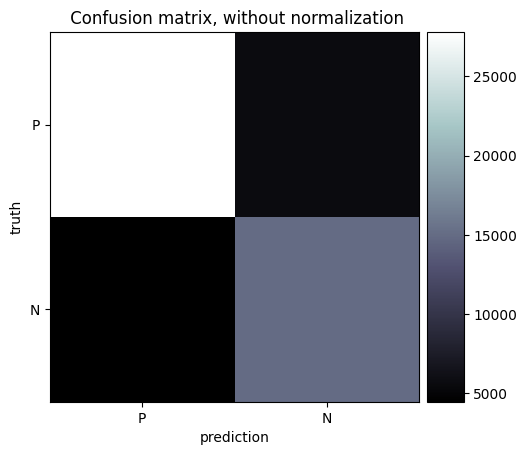

In [84]:
plot_confusion_matrix(test_y, y_pred_rf, normalize=False,
                      title='',
                      cmap=plt.cm.bone)


**Figure 1:** Confusion matrix for the Random Forest Classifier, this plot is flipped of how it normally should look and goes from bottom left to top right. This confusion matrix shows there are more background particles than higgs bosons.

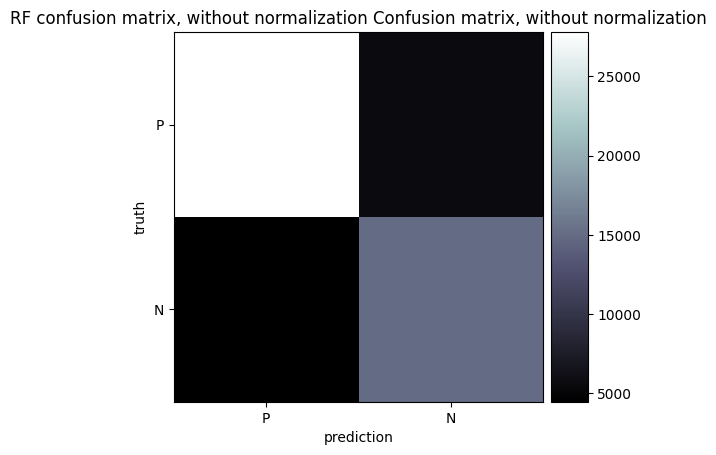

In [85]:
plot_confusion_matrix(test_y, y_pred_gbt, normalize=False,
                      title='RF confusion matrix, without normalization',
                      cmap=plt.cm.bone)

**Figure 2:** Similar confusion Matrix but for the Gradient Boosted classifier. It looks identical to the Random Forest one to me....

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata_weights, testdata_weights, train_weights, test_weights = ...

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(...)
gbtR = ...
gbtR.fit(...)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:

print("L1 RF....."

L1 GBT 53154.297722502015


**Discuss!**

# Choose between feature importance and grid optimization (both 461 and 661)


Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







In [89]:
feature_importance = rf.feature_importances_
# Sort from low to high
highest = feature_importance.argsort()[-4:][::-1]

higgsdata.iloc[:, highest] #this sorts the data by feature

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,PRI_tau_pt
0,138.470,51.655,97.827,32.638
1,160.937,68.768,103.235,42.014
3,143.905,81.417,80.943,22.647
4,175.864,16.915,134.805,28.209
5,89.744,13.550,59.149,53.651
...,...,...,...,...
249991,133.457,77.540,88.989,58.596
249993,130.075,3.918,66.781,27.364
249994,217.020,47.156,62.824,28.586
249997,105.457,60.526,75.839,35.636


In [ ]:
# choose your preferred values for the parameters you will test



- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [91]:
random_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 10, None],
    'max_features': ['auto', 'sqrt']
}

print(random_grid)


{'n_estimators': [10, 100, 1000], 'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt']}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [93]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [94]:
random_search.fit(train_x, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=365),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [96]:
print(f"Tuned RF  Parameters: {random_search.best_params_}")
print(f"Best score is {random_search.best_score_}")


Tuned RF  Parameters: {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None}
Best score is 0.8122569552780042


In [97]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters


In [98]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,740.22615,20.133466,18.58247,0.369108,1000,auto,None,"{'n_estimators': 1000, 'max_features': 'auto',...",0.810466,0.811614,0.814691,0.812257,0.001784,1


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


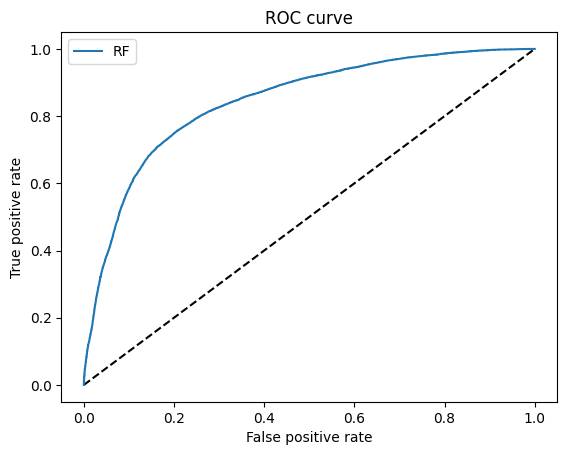

In [111]:
# The random forest model by itself
from sklearn.metrics import roc_curve, auc
rf_model = RandomForestClassifier(n_estimators= 100,max_features= 'auto', max_depth= 3, random_state = 365)
rf_model.fit(train_x, train_y=="s")

y_pred_grd = rf_model.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_y=="s", y_pred_grd)
roc_auc = auc(fpr_rf, tpr_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [112]:
print(f'The AUC for this curve is: {roc_auc:0.3f}')

The AUC for this curve is: 0.844


**Figure 3:** ROC curve showing the performance of the classification model across varying threshholds. This curves AUC of 0.84 represents a performance that is better than just randomly guessing the solution.